In [3]:
import numpy as np
import sys,math
sys.path.append('/home/lukas/projects/millifluidics/programs/extractdropletdata/')
import millidrop_dataclass as mdc
import os,glob
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd


from scipy.optimize import curve_fit

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12,8]
matplotlib.rc('font',family='Monospace')

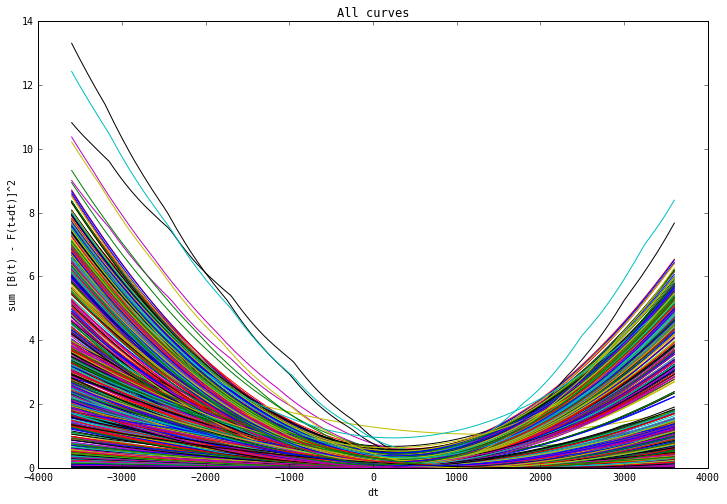

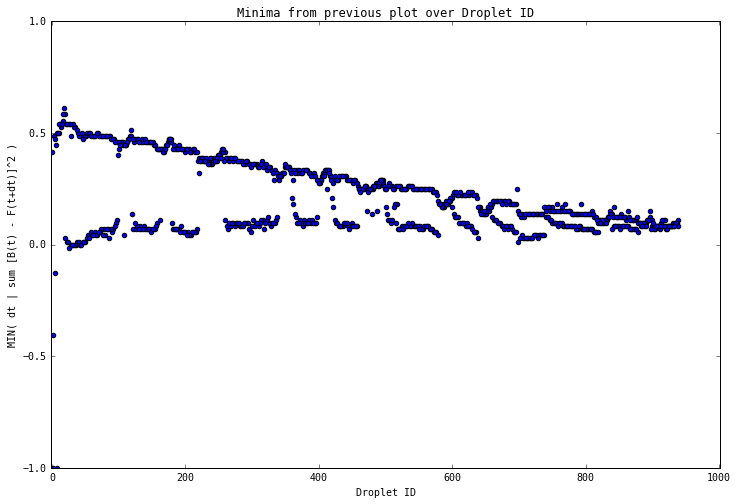

In [52]:
dropdir = '/home/lukas/projects/millifluidics/experimentaldata/maxime2017/2017-08-08_qbiokitp/droplets/'
dropfiles = glob.glob(dropdir + '*.csv')

timelattice = np.linspace(4000,150000,200)
dtlattice   = np.linspace(-3600,3600,72*2+1)

dtmin = list()

for dropfile in dropfiles:

    data = pd.read_csv(dropfile)
    
    dropID = int(os.path.basename(dropfile)[0:4])
    #print dropID
    t = np.array(data['time'])
    f = np.array(data['fluo_2_mean'])

    tf = t[::2]
    tb = t[1::2]

    ff = f[::2]
    fb = f[1::2]


    squarediff = list()
    for dt in dtlattice:
        intF_b = np.interp(timelattice + dt,tb,fb)
        intF_f = np.interp(timelattice,tf,ff)

        squarediff.append(np.sum((intF_b - intF_f)**2))

    dtmin.append(np.array([dropID,dtlattice[np.argmin(squarediff)]/3.6e3]))
    
    plt.plot(dtlattice,squarediff)
    
plt.title('All curves')
plt.xlabel('dt')
plt.ylabel('sum [B(t) - F(t+dt)]^2')
plt.show()

dropIDs,dt = np.transpose(dtmin)
plt.scatter(dropIDs,dt)
plt.title('Minima from previous plot over Droplet ID')
plt.xlabel('Droplet ID')
plt.ylabel('MIN( dt | sum [B(t) - F(t+dt)]^2 )')
plt.xlim(-2,1002)
plt.ylim(-1,1)
plt.show()